In [31]:
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from jre_utils.config import asset_types

from jre_utils.datapath import (
    model_built_data_paths,
    model_ready_data_paths,
    get_derived_csv_path,
    get_derived_lpa_path,
    get_derived_plps_path,
)

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [32]:
asset_type = "condo"
years_ahead = 2

metrics = {
    "weighted_mean": "unit_price_wmean",
    "weighted_median": "unit_price_wmedian",
    "mean": "unit_price_mean",
    "median": "unit_price_median",
    "weighted_mean_smoothed": "unit_price_wmean_smoothed",
    "weighted_median_smoothed": "unit_price_wmedian_smoothed",
    "mean_smoothed": "unit_price_mean_smoothed",
    "median_smoothed": "unit_price_median_smoothed",
}

dataset_paths = {
    "transactions": get_derived_csv_path(asset_type),
    "lpa": get_derived_lpa_path(),
    "plps": get_derived_plps_path()
}

granularity_columns = ["area", "area_code"]
group_by_columns = granularity_columns + ["year"]
display_columns = ["unit_price", "total_traded_area", "count"]

# metric_key_unsmoothed = "weighted_median"
metric_key_unsmoothed = "median"
metric_unsmoothed = metrics[metric_key_unsmoothed]

metric_key = f"{metric_key_unsmoothed}_smoothed"
metric = metrics[metric_key]

metric_pct_chg = metric + "_pct_chg"
upcoming_metric = "upcoming_" + metric

In [33]:
start_year = 2006
eval_start_year = 2020 # eval_years = [2020, 2021, 2022]
eval_end_year = 2022

dataset_key = "transactions"
years_ahead = 2

dataset_name = f"sequence_{dataset_key}_{asset_type}_{metric_key}_{years_ahead}"
output_dataset_name = f"{dataset_name}_{eval_start_year}"
model_built_data_path = model_built_data_paths[dataset_name]
model_ready_data_path = model_ready_data_paths[dataset_name]

df = pd.read_csv(model_built_data_path)
df = df.assign(asset_type=asset_type)
df = df.sample(frac=1).reset_index(drop=True)
df = df.sort_values(by=["year"]).reset_index(drop=True)


In [34]:
df

,area_code,area,year,asset_type,unit_price_median_smoothed_pct_chg,count_growth,yearly_price_growth,total_tax_growth,taxable_income_growth,taxable_income_per_taxpayer_growth,net_migration_ratio,new_dwellings_ratio,taxpayer_count_growth,unit_price_median_smoothed,count,total_traded_area,in_migrations,out_migrations,population,taxpayer_count,taxable_income,taxable_income_per_taxpayer,total_tax,new_dwellings,existing_dwellings,unit_price_median_smoothed_log_normalized_yearly,count_log_normalized_yearly,total_traded_area_log_normalized_yearly,in_migrations_log_normalized_yearly,out_migrations_log_normalized_yearly,population_log_normalized_yearly,taxpayer_count_log_normalized_yearly,taxable_income_log_normalized_yearly,taxable_income_per_taxpayer_log_normalized_yearly,total_tax_log_normalized_yearly,new_dwellings_log_normalized_yearly,existing_dwellings_log_normalized_yearly,unit_price_median_smoothed_pct_chg_normalized_yearly,count_growth_normalized_yearly,yearly_price_growth_normalized_yearly,total_tax_growth_normalized_yearly,taxable_income_growth_normalized_yearly,taxable_income_per_taxpayer_growth_normalized_yearly,net_migration_ratio_normalized_yearly,new_dwellings_ratio_normalized_yearly,taxpayer_count_growth_normalized_yearly,migrations_is_available,taxable_income_is_available,dwellings_is_available,total_tax_is_available,metric_pct_chg_is_available
0,26208,Kyoto-fu Muko-shi,2005,condo,NaN,NaN,NaN,0.014112,0.027926,-0.017065,-0.002037,0.014634,0.045771,205094.953098,11.0,730.0,2485.0,2600.0,56458.0,22962.0,7.856276e+07,3421.424832,6289086.0,293.0,20022.0,-0.203526,-0.196721,-0.067822,0.541557,0.502249,0.473964,0.585220,0.635901,0.858880,0.559837,-0.481577,-0.578667,NaN,NaN,NaN,-0.076018,0.643132,0.129862,0.337140,-0.536044,0.864171,1,1,1,1,0
1,21204,Gifu-ken Tajimi-shi,2005,condo,NaN,NaN,NaN,0.095412,0.003655,-0.021041,-0.001660,0.017659,0.025226,148084.213121,4.0,310.0,3679.0,3864.0,111423.0,48729.0,1.634795e+08,3354.871144,13562136.0,713.0,40375.0,-0.562169,-0.840281,-0.915621,0.786577,0.762295,0.922777,1.080943,1.095688,0.723833,1.045066,0.124624,0.190142,NaN,NaN,NaN,0.481091,0.066452,-0.014920,0.374492,-0.308981,0.124081,1,1,1,1,0
2,21213,Gifu-ken Kakamigahara-shi,2005,condo,NaN,NaN,NaN,0.038930,0.010480,-0.018612,-0.000316,0.021791,0.029644,130544.740758,8.0,510.0,5007.0,5053.0,145354.0,62591.0,2.117721e+08,3383.427378,19710037.0,1086.0,49836.0,-0.700988,-0.408197,-0.423008,0.979052,0.938401,1.098279,1.245881,1.258086,0.782103,1.281121,0.411766,0.420912,NaN,NaN,NaN,0.094043,0.228629,0.073531,0.507790,0.001123,0.283206,1,1,1,1,0
3,13101,Tokyo-to Chiyoda-ku,2005,condo,NaN,NaN,NaN,0.111877,0.175917,0.114788,0.019842,0.084664,0.054835,934698.866400,111.0,3230.0,5588.0,4622.0,48684.0,23411.0,1.897983e+08,8107.227543,14519864.0,2099.0,24792.0,1.466683,1.445200,1.406450,1.047618,0.879876,0.376162,0.597979,1.189350,6.790369,1.088151,0.861661,-0.344435,NaN,NaN,NaN,0.593920,4.159389,4.930761,2.507318,4.719660,1.190658,1,1,1,1,0
4,4100,Miyagi-ken Sendai-shi,2006,condo,NaN,NaN,NaN,0.011382,0.034190,-0.022088,-0.001961,0.033663,0.057549,175209.723866,377.0,22990.0,71319.0,73424.0,1073459.0,446327.0,1.516653e+09,3398.076852,169560376.0,15435.0,458509.0,-0.644177,0.781246,0.863487,2.631779,2.703809,2.413121,2.493398,2.457388,1.027703,2.608476,2.437627,2.802343,NaN,NaN,NaN,-0.006869,0.132231,0.724668,0.357181,0.914551,-0.610560,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5106,1100,Hokkaido Sapporo-shi,2022,condo,0.191434,-0.077996,0.093596,0.038884,NaN,NaN,0.004506,NaN,NaN,263282.373587,1454.0,98880.0,114194.0,105217.0,1992048.0,NaN,NaN,NaN,347606361.0,NaN,NaN,-0.048109,2.379387,2.540423,2.927897,2.981379,2.749618,NaN,NaN,NaN,1.495879,NaN,NaN,1.249060,-0.222865,1.310204,0.030195,NaN,NaN,0.720856,NaN,NaN,1,0,0,1,1
5107,11324,Saitama-ken Miyoshi-machi,2022,condo,-0

In [35]:
log_normalize_columns = [
    metric,
    "count",
    "total_traded_area",
    "in_migrations",
    "out_migrations",
    "population",
    "taxpayer_count",
    "taxable_income",
    "taxable_income_per_taxpayer",
    "total_tax",
    "new_dwellings",
    "existing_dwellings",
]

normalize_columns = [
    metric_pct_chg,
    "count_growth",
    "yearly_price_growth",
    "total_tax_growth",
    "taxable_income_growth",
    "taxable_income_per_taxpayer_growth",
    "net_migration_ratio",
    "new_dwellings_ratio",
    "taxpayer_count_growth",
]

maintain_columns = [
    "migrations_is_available",
    "taxable_income_is_available",
    "dwellings_is_available",
    "total_tax_is_available",
    "metric_pct_chg_is_available"
]

id_columns = ["area_code", "area", "year", "asset_type"]

feature_columns = (
    [f"{column}_log_normalized_yearly" for column in log_normalize_columns]
    + [f"{column}_normalized_yearly" for column in normalize_columns]
    + maintain_columns
)

final_columns = id_columns + normalize_columns + log_normalize_columns + feature_columns

# add ratios and growths if necessary

df = df[final_columns]

In [36]:
# for column in log_normalize_columns:
#     df[f"{column}_log"] = df[column].apply(lambda x: np.log10(1 + x))
#     df[f"{column}_log_normalized_yearly"] = df.groupby("year")[f"{column}_log"].transform(
#         lambda x: (x - x.mean()) / x.std()
#     )

# for column in normalize_columns:
#     df[f"{column}_normalized_yearly"] = df.groupby("year")[column].transform(
#         lambda x: (x - x.mean()) / x.std()
#     )

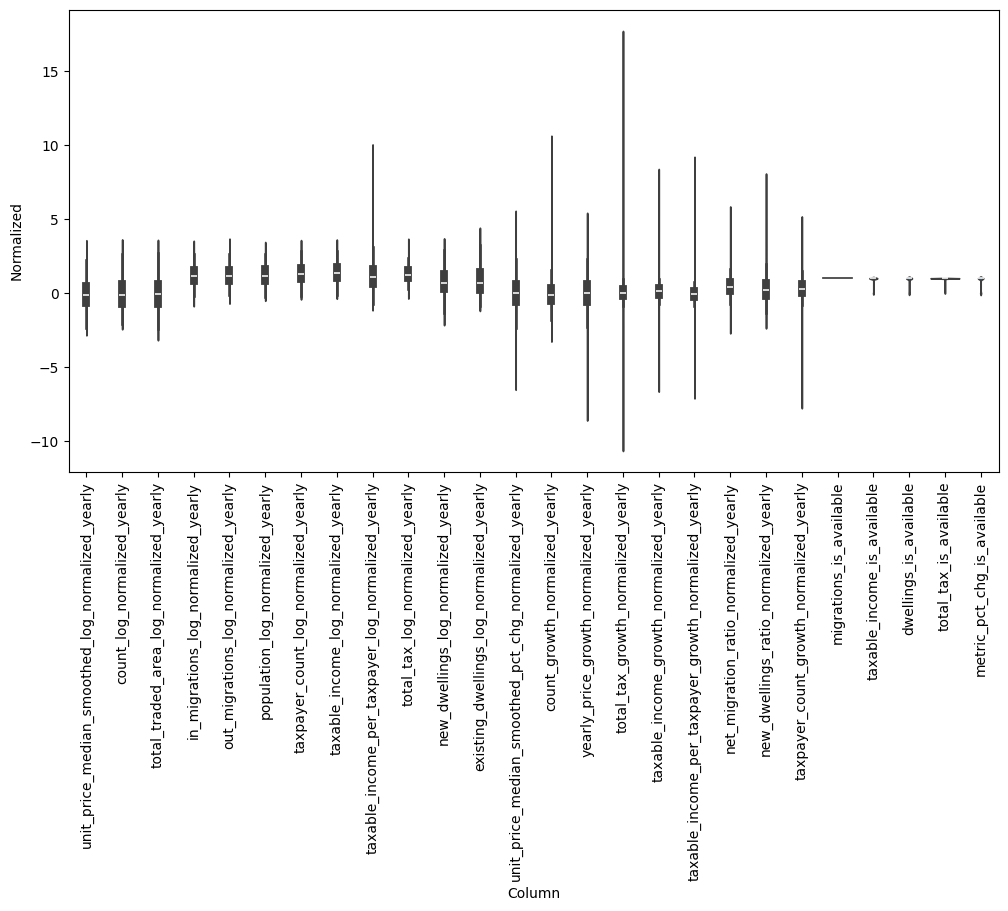

In [37]:
df_std = df[feature_columns].melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df[feature_columns].keys(), rotation=90)

In [38]:
df = df[final_columns]
df[final_columns].describe()

,area_code,year,unit_price_median_smoothed_pct_chg,count_growth,yearly_price_growth,total_tax_growth,taxable_income_growth,taxable_income_per_taxpayer_growth,net_migration_ratio,new_dwellings_ratio,taxpayer_count_growth,unit_price_median_smoothed,count,total_traded_area,in_migrations,out_migrations,population,taxpayer_count,taxable_income,taxable_income_per_taxpayer,total_tax,new_dwellings,existing_dwellings,unit_price_median_smoothed_log_normalized_yearly,count_log_normalized_yearly,total_traded_area_log_normalized_yearly,in_migrations_log_normalized_yearly,out_migrations_log_normalized_yearly,population_log_normalized_yearly,taxpayer_count_log_normalized_yearly,taxable_income_log_normalized_yearly,taxable_income_per_taxpayer_log_normalized_yearly,total_tax_log_normalized_yearly,new_dwellings_log_normalized_yearly,existing_dwellings_log_normalized_yearly,unit_price_median_smoothed_pct_chg_normalized_yearly,count_growth_normalized_yearly,yearly_price_growth_normalized_yearly,total_tax_growth_normalized_yearly,taxable_income_growth_normalized_yearly,taxable_income_per_taxpayer_growth_normalized_yearly,net_migration_ratio_normalized_yearly,new_dwellings_ratio_normalized_yearly,taxpayer_count_growth_normalized_yearly,migrations_is_available,taxable_income_is_available,dwellings_is_available,total_tax_is_available,metric_pct_chg_is_available
count,5111.000000,5111.000000,4439.000000,4770.000000,4770.000000,5078.000000,4798.000000,4798.000000,5111.000000,4543.000000,4798.000000,5.111000e+03,5111.000000,5111.000000,5111.000000,5111.000000,5.111000e+03,4.798000e+03,4.798000e+03,4798.000000,5.088000e+03,4543.000000,4.543000e+03,5.111000e+03,5.111000e+03,5.111000e+03,5111.000000,5111.000000,5111.000000,4798.000000,4798.000000,4798.000000,5088.000000,4543.000000,4543.000000,4.439000e+03,4.770000e+03,4.770000e+03,5078.000000,4798.000000,4798.000000,5111.000000,4543.000000,4798.000000,5111.0,5111.000000,5111.000000,5111.000000,5111.000000
mean,19947.395422,2014.491489,0.032964,0.082175,0.015235,0.008169,0.007731,0.000185,0.000387,0.016366,0.007442,2.626146e+05,154.772452,9009.187048,12351.367247,12093.226163,2.806702e+05,1.274699e+05,4.541998e+08,3476.133216,4.540604e+07,2360.975787,1.393530e+05,5.135134e-16,-6.473224e-17,2.066218e-16,1.241783,1.238111,1.224426,1.356171,1.403400,1.263926,1.324700,0.804200,0.853338,-3.921671e-17,3.072315e-18,1.033415e-17,0.079565,0.130657,-0.048631,0.482910,0.328497,0.344627,1.0,0.938760,0.888867,0.995500,0.868519
std,10154.971618,4.618083,0.087786,0.395240,0.047746,0.039129,0.031488,0.022677,0.005111,0.006223,0.016481,1.755491e+05,351.552632,19571.514183,21145.987577,20279.820890,3.811617e+05,1.735894e+05,6.619150e+08,797.229365,7.774505e+07,3633.415767,1.941294e+05,9.983352e-01,9.983352e-01,9.983352e-01,0.591924,0.611579,0.570563,0.572373,0.562609,1.096725,0.509559,0.769932,0.920230,9.983086e-01,9.983211e-01,9.983211e-01,0.770839,0.511619,0.537131,0.577406,0.822003,0.505988,0.0,0.239794,0.314327,0.066938,0.337959
min,1100.000000,2005.000000,-0.577661,-0.812500,-0.454728,-0.466623,-0.313802,-0.192218,-0.036352,0.001265,-0.337342,6.545327e+04,3.000000,100.000000,292.000000,443.000000,1.628800e+04,7.118000e+03,2.125598e+07,2441.662747,2.089891e+06,44.000000,1.578900e+04,-2.486190e+00,-2.078430e+00,-2.820555e+00,-0.669647,-0.485729,-0.308341,-0.211530,-0.169920,-0.755111,-0.179642,-1.878069,-0.860861,-6.152355e+00,-2.903888e+00,-8.237310e+00,-10.382247,-6.466902,-6.912359,-2.505351,-2.074150,-7.589756,1.0,0.000000,0.000000,0.000000,0.000000
25%,12222.000000,2011.000000,-0.019322,-0.125000,-0.012651,-0.008423,-0.002639,-0.007882,-0.002448,0.012358,0.000492,1.609472e+05,20.000000,1335.000000,3557.500000,3655.000000,1.014605e+05,4.464925e+04,1.442945e+08,3092.540972,1.410713e+07,691.000000,4.808350e+04,-6.616776e-01,-7.445491e-01,-7.413134e-01,0.848199,0.834163,0.853395,0.972661,1.003299,0.630417,1.038620,0.255723,0.197451,-5.756714e-01,-5.271013e-01,-5.649879e-01,-0.184745,-0.097444,-0.254043,0.145258,-0.18660

In [39]:
# df = df.fillna(0) # Fill NA right before the model run
df.to_csv(model_ready_data_path, index=False)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5111 entries, 0 to 5110
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   area_code                                             5111 non-null   int64  
 1   area                                                  5111 non-null   object 
 2   year                                                  5111 non-null   int64  
 3   asset_type                                            5111 non-null   object 
 4   unit_price_median_smoothed_pct_chg                    4439 non-null   float64
 5   count_growth                                          4770 non-null   float64
 6   yearly_price_growth                                   4770 non-null   float64
 7   total_tax_growth                                      5078 non-null   float64
 8   taxable_income_growth                                 4798

In [41]:
# Combine Dataframes for model training

combined_df = pd.DataFrame()
for asset_type in asset_types.keys():
    dataset_name = f"sequence_{dataset_key}_{asset_type}_{metric_key}_{years_ahead}"
    df = pd.read_csv(model_ready_data_paths[dataset_name])
    combined_df = pd.concat([combined_df, df], ignore_index=True)
    

In [42]:
asset_type_dummies = pd.get_dummies(combined_df["asset_type"], drop_first=True, dtype=float)
combined_df = pd.concat([combined_df, asset_type_dummies], axis=1)

In [43]:
combined_df

,area_code,area,year,asset_type,unit_price_median_smoothed_pct_chg,count_growth,yearly_price_growth,total_tax_growth,taxable_income_growth,taxable_income_per_taxpayer_growth,net_migration_ratio,new_dwellings_ratio,taxpayer_count_growth,unit_price_median_smoothed,count,total_traded_area,in_migrations,out_migrations,population,taxpayer_count,taxable_income,taxable_income_per_taxpayer,total_tax,new_dwellings,existing_dwellings,unit_price_median_smoothed_log_normalized_yearly,count_log_normalized_yearly,total_traded_area_log_normalized_yearly,in_migrations_log_normalized_yearly,out_migrations_log_normalized_yearly,population_log_normalized_yearly,taxpayer_count_log_normalized_yearly,taxable_income_log_normalized_yearly,taxable_income_per_taxpayer_log_normalized_yearly,total_tax_log_normalized_yearly,new_dwellings_log_normalized_yearly,existing_dwellings_log_normalized_yearly,unit_price_median_smoothed_pct_chg_normalized_yearly,count_growth_normalized_yearly,yearly_price_growth_normalized_yearly,total_tax_growth_normalized_yearly,taxable_income_growth_normalized_yearly,taxable_income_per_taxpayer_growth_normalized_yearly,net_migration_ratio_normalized_yearly,new_dwellings_ratio_normalized_yearly,taxpayer_count_growth_normalized_yearly,migrations_is_available,taxable_income_is_available,dwellings_is_available,total_tax_is_available,metric_pct_chg_is_available,condo,land
0,21213,Gifu-ken Kakamigahara-shi,2005,land,NaN,NaN,NaN,0.038930,0.010480,-0.018612,-0.000316,0.021791,0.029644,42516.348537,140.0,52820.0,5007.0,5053.0,145354.0,62591.0,2.117721e+08,3383.427378,19710037.0,1086.0,49836.0,-0.647730,0.549696,0.860006,0.979052,0.938401,1.098279,1.245881,1.258086,0.782103,1.281121,0.411766,0.420912,NaN,NaN,NaN,0.094043,0.228629,0.073531,0.507790,0.001123,0.283206,1,1,1,1,0,0.0,1.0
1,26100,Kyoto-fu Kyoto-shi,2005,land,NaN,NaN,NaN,0.053238,0.024819,-0.004608,-0.008203,0.022275,0.029564,185705.393633,365.0,97725.0,74397.0,86881.0,1521814.0,559332.0,1.980264e+09,3540.409615,242059317.0,15069.0,676493.0,0.260158,1.431361,1.398559,2.664656,2.805940,2.648713,2.688825,2.660729,1.093900,2.864769,2.208080,3.279927,NaN,NaN,NaN,0.192091,0.569316,0.583406,-0.274506,0.037424,0.280324,1,1,1,1,0,0.0,1.0
2,27100,Osaka-fu Osaka-shi,2005,land,NaN,NaN,NaN,0.016285,0.024811,-0.003319,0.016283,0.033104,0.028224,270581.395349,405.0,93145.0,153617.0,113769.0,2447287.0,949502.0,3.215702e+09,3386.724523,628572551.0,42858.0,1294646.0,0.491962,1.527229,1.356544,3.117567,2.982971,2.962352,3.037483,2.964925,0.788799,3.467318,2.922161,3.991423,NaN,NaN,NaN,-0.061131,0.569132,0.630354,2.154231,0.850117,0.232065,1,1,1,1,0,0.0,1.0
3,21210,Gifu-ken Ena-shi,2005,land,NaN,NaN,NaN,0.028802,-0.001349,-0.017106,-0.004933,0.015684,0.016031,11949.491848,46.0,19870.0,1396.0,1649.0,51285.0,22626.0,6.781020e+07,2997.003403,6506783.0,288.0,18363.0,-1.429302,-0.465752,0.004243,0.181530,0.203429,0.410522,0.575509,0.543550,-0.051634,0.581324,-0.493296,-0.673474,NaN,NaN,NaN,0.024642,-0.052429,0.128356,0.049858,-0.457257,-0.207145,1,1,1,1,0,0.0,1.0
4,13111,Tokyo-to Ota-ku,2005,land,NaN,NaN,NaN,0.048753,0.044228,0.020891,0.006731,0.034646,0.022859,474546.295319,142.0,27520.0,41234.0,36568.0,693234.0,324942.0,1.386403e+09,4266.617406,60647814.0,11015.0,317934.0,0.837925,0.562714,0.289327,2.296013,2.237774,2.129615,2.331009,2.437033,2.376644,1.990815,1.993996,2.452228,NaN,NaN,NaN,0.161359,1.030470,1.511862,1.206800,0.965806,0.038827,1,1,1,1,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43476,1100,Hokkaido Sapporo-shi,2022,condo,0.191434,-0.077996,0.093596,0.038884,NaN,NaN,0.004506,NaN,NaN,263282.373587,1454.0,98880.0,114194.0,105217.0,1992048.0,NaN,NaN,NaN,347606361.0,NaN,NaN,-0.048109,2.379387,2.540423,2.927897,2.981379,2.749618,NaN,NaN,NaN,1.495879,NaN,NaN,1.249060,-0.222865,1.310204,0.030195,NaN,NaN,0.720856,NaN

In [44]:
dataset_name = f"sequence_{dataset_key}_{"all"}_{metric_key}_{years_ahead}"
combined_df.to_csv(model_ready_data_paths[dataset_name], index=False)

In [45]:
# This method may be bad because the values of the normalized factors are different
# Condo has ~400 areas, Land has ~ 1400, and Building has ~1100
# The act of yearly normalization should combine all areas
# normalizing individually will result in inconsistencies